In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
plt.rc(
    'figure',
    autolayout=True,
    figsize=(20, 7),
    titlesize=20,
    titleweight='bold',
)
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=20,
    titlepad=10,
)
        
import warnings
warnings.filterwarnings(action='ignore')

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
test = pd.read_csv('../input/titanic/test.csv', index_col='PassengerId') # data.iloc[891:], index_col='PassengerId'
train = pd.read_csv('../input/titanic/train.csv', index_col='PassengerId') # data.iloc[:891]

y = train['Survived'].copy()
train['Survived'].replace({1:'Survived', 0:'Not Survived'}, inplace=True)
data = pd.concat([train, test])

# **TABLE OF CONTENT**
# 1. Basic info
# 2. Analysis
# * 2.1 Survived
# * 2.2 SibSp&Parch
# * 2.3 Embarked
# * 2.4 Ticket&Fare
# * 2.5 Age
# * 2.6 Cabin
# 3. New features
# 4. Encoding
# 5. Model predict

# **1) Basic info**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 122.7+ KB


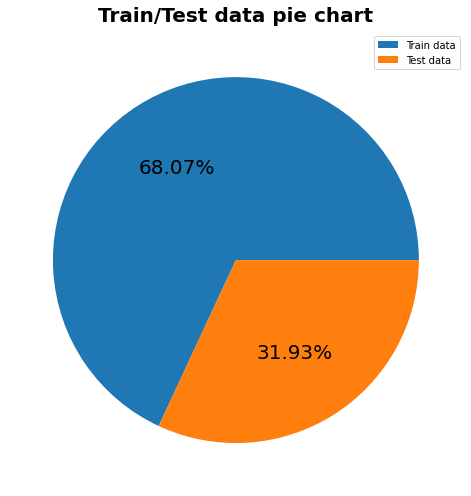

In [4]:
fig, ax = plt.subplots()
ax.pie(x=[len(train),len(test)], autopct='%.2f%%', textprops={'fontsize': 20})

ax.set(title='Train/Test data pie chart');
ax.legend(['Train data','Test data']);

In [5]:
data.nunique()

Survived       2
Pclass         3
Name        1307
Sex            2
Age           98
SibSp          7
Parch          8
Ticket       929
Fare         281
Cabin        186
Embarked       3
dtype: int64

In [6]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,Not Survived,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,Not Survived,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **2) Analysis**

# 2.1) Survived

In [7]:
train.groupby(['Survived', 'Sex'])['Survived'].agg(total_number=(lambda x: x.count()), 
                                                   procent_of_total=(lambda x: x.count()/len(train)))
                                                  

total_number  procent_of_total
Survived     Sex                                   
Not Survived female            81          0.090909
             male             468          0.525253
Survived     female           233          0.261504
             male             109          0.122334

In [8]:
train.groupby(['Survived', 'Pclass'])['Survived'].agg(total_number=(lambda x: x.count()),
                                                      procent_of_total=(lambda x: x.count()/len(train)))

total_number  procent_of_total
Survived     Pclass                                
Not Survived 1                 80          0.089787
             2                 97          0.108866
             3                372          0.417508
Survived     1                136          0.152637
             2                 87          0.097643
             3                119          0.133558

In [9]:
train.groupby(['Survived', 'Embarked'])['Survived'].agg(total_number=(lambda x: x.count()),
                                                        procent_of_total=(lambda x: x.count()/len(train)))

total_number  procent_of_total
Survived     Embarked                                
Not Survived C                   75          0.084175
             Q                   47          0.052750
             S                  427          0.479237
Survived     C                   93          0.104377
             Q                   30          0.033670
             S                  217          0.243547

In [10]:
train.groupby(['Survived', 'SibSp'])['Survived'].agg(total_number=(lambda x: x.count()),
                                                     procent_of_total=(lambda x: x.count()/len(train)))

total_number  procent_of_total
Survived     SibSp                                
Not Survived 0               398          0.446689
             1                97          0.108866
             2                15          0.016835
             3                12          0.013468
             4                15          0.016835
             5                 5          0.005612
             8                 7          0.007856
Survived     0               210          0.235690
             1               112          0.125701
             2                13          0.014590
             3                 4          0.004489
             4                 3          0.003367

In [11]:
train.groupby(['Survived', 'Parch'])['Survived'].agg(total_number=(lambda x: x.count()),
                                                     procent_of_total=(lambda x: x.count()/len(train)))

total_number  procent_of_total
Survived     Parch                                
Not Survived 0               445          0.499439
             1                53          0.059484
             2                40          0.044893
             3                 2          0.002245
             4                 4          0.004489
             5                 4          0.004489
             6                 1          0.001122
Survived     0               233          0.261504
             1                65          0.072952
             2                40          0.044893
             3                 3          0.003367
             5                 1          0.001122

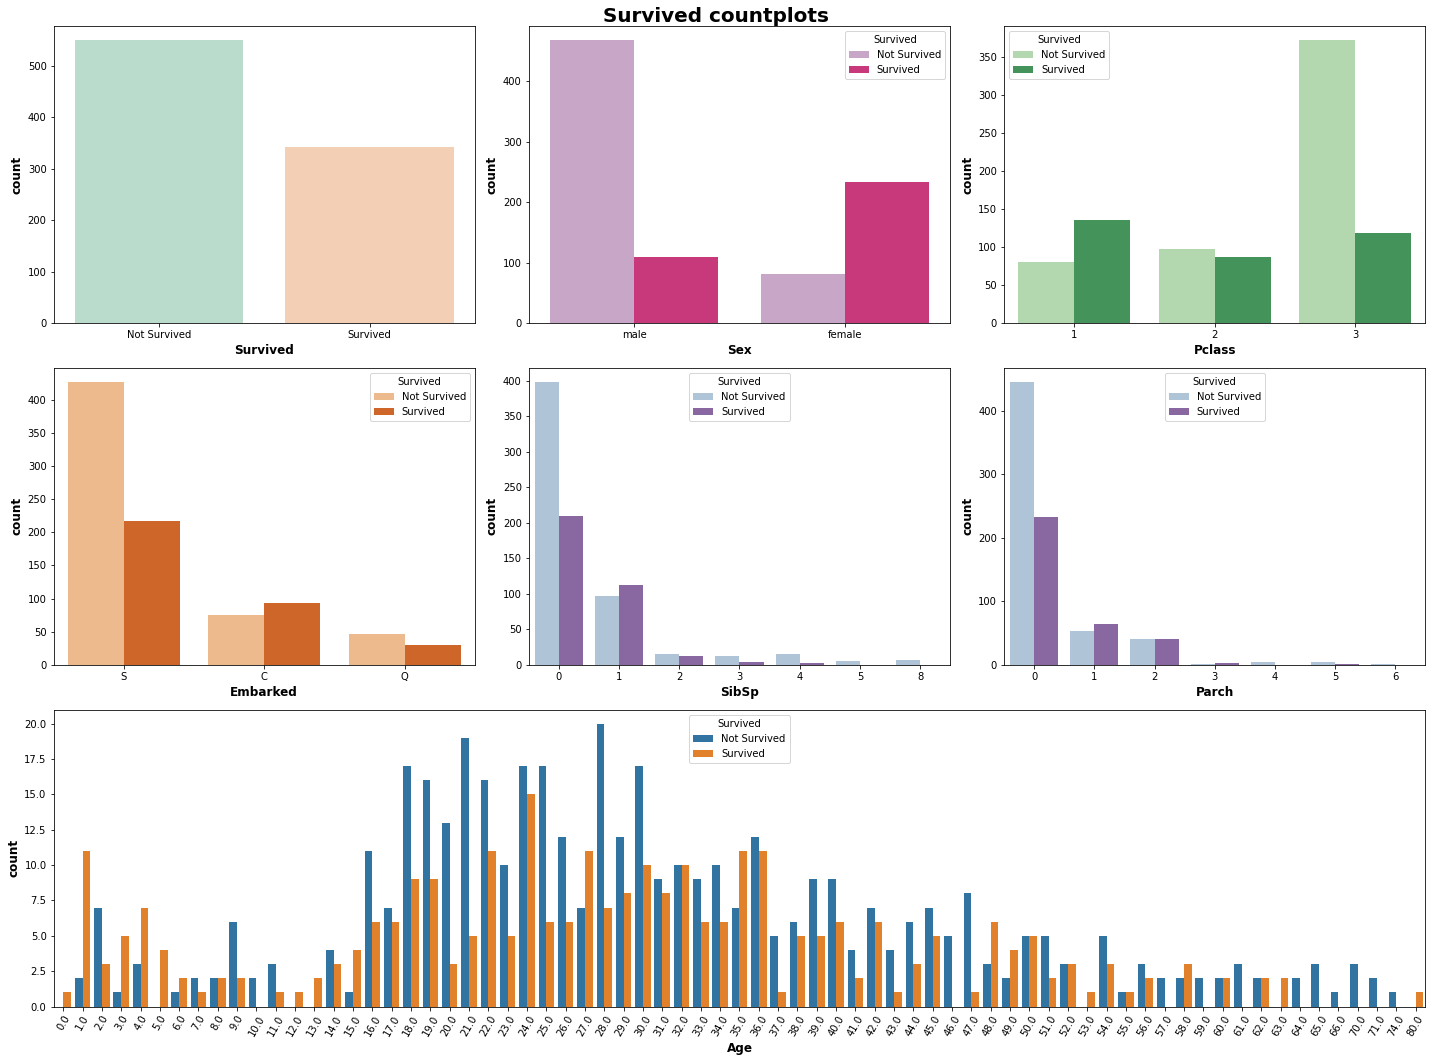

In [12]:
fig, ax = plt.subplot_mosaic("ABC;DEF;GGG", figsize=(20,15))
sns.countplot(ax=ax['A'], x='Survived', palette="Pastel2", data=train)
sns.countplot(ax=ax['B'], x='Sex', hue='Survived', palette='PuRd', data=train)
sns.countplot(ax=ax['C'], x='Pclass', hue='Survived', palette='Greens', data=train)
sns.countplot(ax=ax['D'], x='Embarked', hue='Survived', palette='Oranges', data=train)
sns.countplot(ax=ax['E'], x='SibSp', hue='Survived', palette='BuPu', data=train)
sns.countplot(ax=ax['F'], x='Parch', hue='Survived', palette='BuPu', data=train)
sns.countplot(ax=ax['G'], x='Age', hue='Survived' , data=train.round()).tick_params(axis='x', rotation=60)
fig.suptitle('Survived countplots');


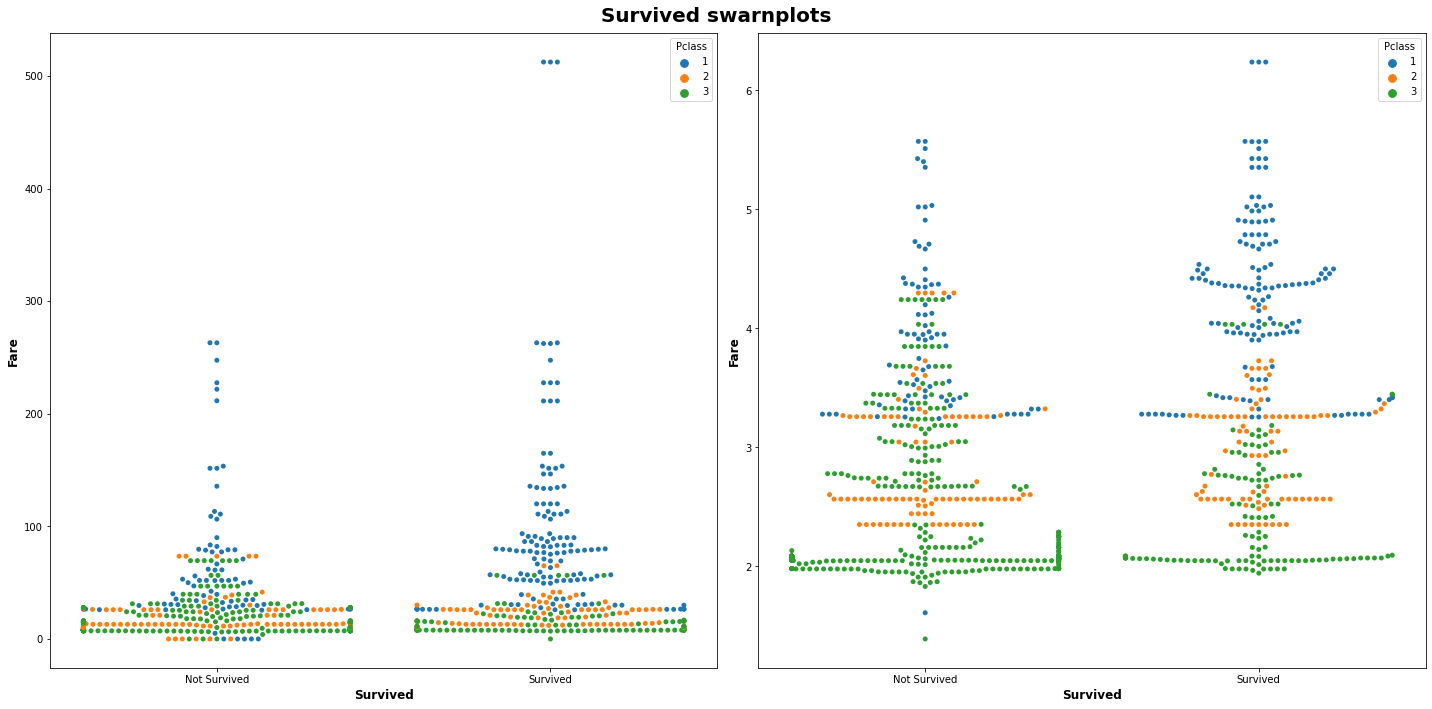

In [13]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.swarmplot(ax=ax[0], x='Survived', y='Fare', hue='Pclass', data=train)
sns.swarmplot(ax=ax[1], x='Survived', y=train['Fare'].apply(np.log), hue='Pclass', data=train)
fig.suptitle('Survived swarnplots');

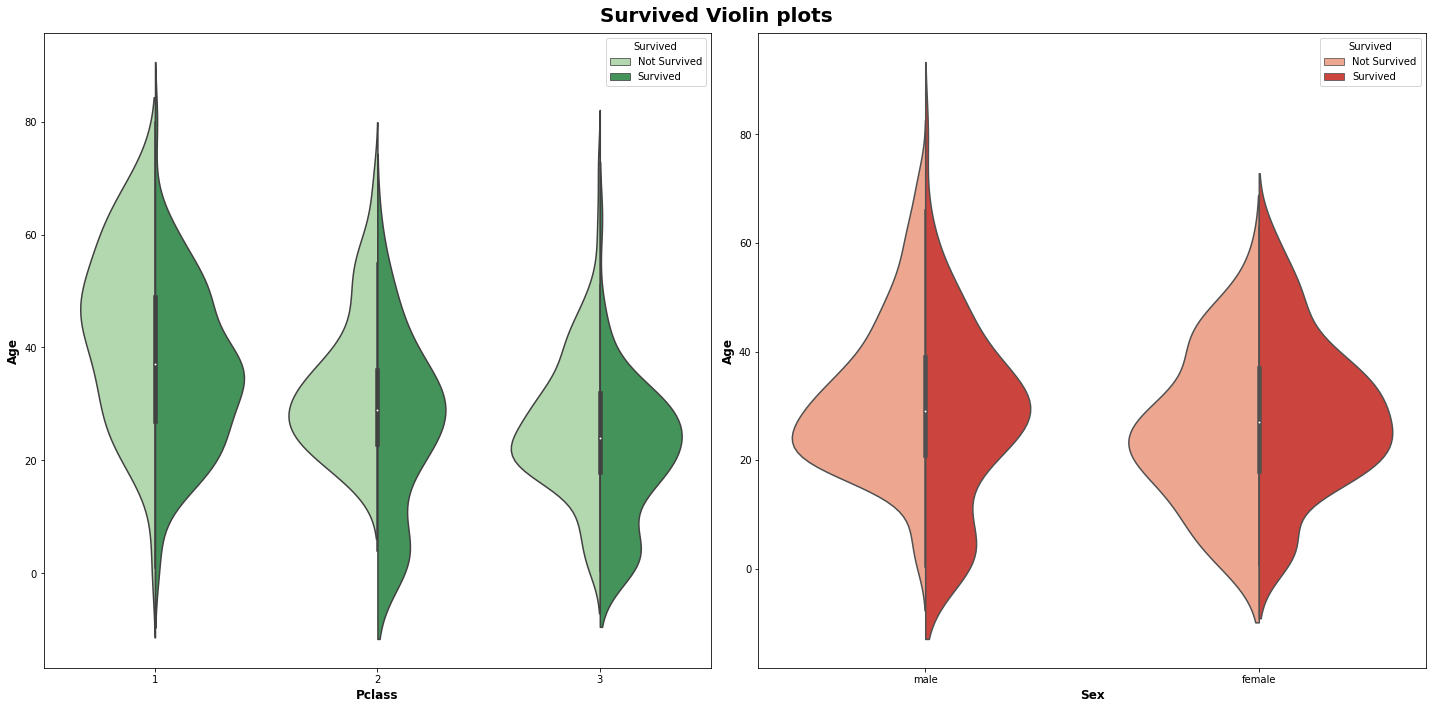

In [14]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.violinplot(ax=ax[0], x='Pclass', y='Age', hue='Survived', split=True, palette='Greens', data=train)
sns.violinplot(ax=ax[1], x='Sex', y='Age', hue='Survived', split=True, palette='Reds', data=train)
fig.suptitle('Survived Violin plots');

# 2.2) SibSp&Parch

In [15]:
pd.crosstab(data['Parch'], data['SibSp'])

SibSp,0,1,2,3,4,5,8
Parch,,,,,,,
0,790,183,26,3,0,0,0
1,52,90,9,9,10,0,0
2,43,29,6,8,12,6,9
3,2,5,1,0,0,0,0
4,2,4,0,0,0,0,0
5,2,4,0,0,0,0,0
6,0,2,0,0,0,0,0
9,0,2,0,0,0,0,0


In [16]:
data['Surname']= data['Name'].apply(lambda x: x[:x.index(',')])
data.groupby(['Surname'])['Sex'].count().sort_values(ascending=False).to_frame()

,Sex
Surname,
Andersson,11
Sage,11
Goodwin,8
Asplund,8
Davies,7
...,...
Humblen,1
Hunt,1
Hyman,1


In [17]:
data[data['Surname']== 'Andersson']    

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
PassengerId,,,,,,,,,,,,
14,Not Survived,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,Andersson
69,Survived,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,Andersson
120,Not Survived,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S,Andersson
147,Survived,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,Andersson
542,Not Survived,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S,Andersson
543,Not Survived,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S,Andersson
611,Not Survived,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S,Andersson
814,Not Survived,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,Andersson
851,Not Survived,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S,Andersson


In [18]:
data[data['Surname']== 'Sage']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
PassengerId,,,,,,,,,,,,
160,Not Survived,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage
181,Not Survived,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage
202,Not Survived,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage
325,Not Survived,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage
793,Not Survived,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage
847,Not Survived,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage
864,Not Survived,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage
1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage
1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,Sage


In [19]:
data[data['Surname']== 'Asplund']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
PassengerId,,,,,,,,,,,,
26,Survived,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,Asplund
183,Not Survived,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S,Asplund
234,Survived,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S,Asplund
262,Survived,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S,Asplund
1046,NaN,3,"Asplund, Master. Filip Oscar",male,13.0,4,2,347077,31.3875,NaN,S,Asplund
1066,NaN,3,"Asplund, Mr. Carl Oscar Vilhelm Gustafsson",male,40.0,1,5,347077,31.3875,NaN,S,Asplund
1118,NaN,3,"Asplund, Mr. Johan Charles",male,23.0,0,0,350054,7.7958,NaN,S,Asplund
1271,NaN,3,"Asplund, Master. Carl Edgar",male,5.0,4,2,347077,31.3875,NaN,S,Asplund


In [20]:
data[data['Surname']== 'Davies']   

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
PassengerId,,,,,,,,,,,,
386,Not Survived,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.50,NaN,S,Davies
550,Survived,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.75,NaN,S,Davies
566,Not Survived,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.15,NaN,S,Davies
901,NaN,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.15,NaN,S,Davies
1039,NaN,3,"Davies, Mr. Evan",male,22.0,0,0,SC/A4 23568,8.05,NaN,S,Davies
1079,NaN,3,"Davies, Mr. Joseph",male,17.0,2,0,A/4 48873,8.05,NaN,S,Davies
1222,NaN,2,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",female,48.0,0,2,C.A. 33112,36.75,NaN,S,Davies


In [21]:
data[data['Ticket']=='C.A. 33112']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
PassengerId,,,,,,,,,,,,
146,Not Survived,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.75,NaN,S,Nicholls
550,Survived,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.75,NaN,S,Davies
1068,NaN,2,"Sincock, Miss. Maude",female,20.0,0,0,C.A. 33112,36.75,NaN,S,Sincock
1222,NaN,2,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",female,48.0,0,2,C.A. 33112,36.75,NaN,S,Davies


In [22]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# 2.3) Embarked

In [23]:
data['Embarked'].isna().sum()

2

In [24]:
data.groupby('Embarked')['Sex'].count().to_frame().style.background_gradient(cmap='coolwarm')

,Sex
Embarked,
C,270
Q,123
S,914


In [25]:
data['Embarked'].fillna('S', inplace=True)

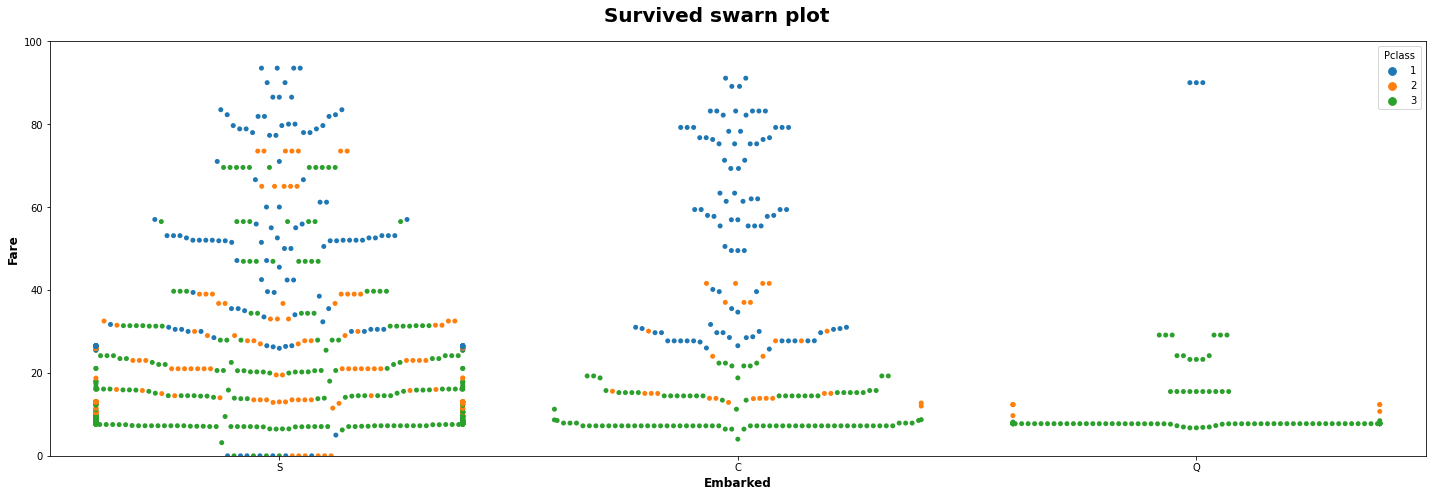

In [26]:
fig, ax = plt.subplots()
sns.swarmplot(x='Embarked', y='Fare', hue='Pclass', data=data)
plt.ylim(0, 100);
fig.suptitle('Survived swarn plot');

# 2.4) Ticket&Fare

In [27]:
data['Fare'].isna().sum()

1

In [28]:
data[data['Fare'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,FamilySize
PassengerId,,,,,,,,,,,,,
1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Storey,1


In [29]:
data['Fare'].fillna(data['Fare'].mode()[0], inplace=True)

In [30]:
data[data['Fare']==0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,FamilySize
PassengerId,,,,,,,,,,,,,
180,Not Survived,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Leonard,1
264,Not Survived,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Harrison,1
272,Survived,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Tornquist,1
278,Not Survived,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,Parkes,1
303,Not Survived,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Johnson,1
414,Not Survived,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,Cunningham,1
467,Not Survived,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,Campbell,1
482,Not Survived,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,Frost,1
598,Not Survived,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Johnson,1


In [31]:
data.loc[(data['Fare']==0)&(data['Pclass']==1),'Fare'] = data['Fare'][data['Pclass']==1].median()
data.loc[(data['Fare']==0)&(data['Pclass']==2),'Fare'] = data['Fare'][data['Pclass']==2].median()
data.loc[(data['Fare']==0)&(data['Pclass']==3),'Fare'] = data['Fare'][data['Pclass']==3].median()

In [32]:
data['Ticket'].isna().sum()

0

In [33]:
data.groupby(['Pclass','Ticket'])['Ticket'].count().sort_values(ascending=False).to_frame()

Ticket
Pclass Ticket              
3      CA. 2343          11
       1601               8
       CA 2144            8
       3101295            7
2      S.O.C. 14879       7
...                     ...
3      2670               1
       2671               1
       2672               1
       2673               1
       W./C. 6609         1

[929 rows x 1 columns]

In [34]:
data[data['Ticket']=='CA 2144']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,FamilySize
PassengerId,,,,,,,,,,,,,
60,Not Survived,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S,Goodwin,8
72,Not Survived,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S,Goodwin,8
387,Not Survived,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S,Goodwin,8
481,Not Survived,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S,Goodwin,8
679,Not Survived,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S,Goodwin,8
684,Not Survived,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S,Goodwin,8
1031,NaN,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9,NaN,S,Goodwin,8
1032,NaN,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9,NaN,S,Goodwin,8


In [35]:
data[data['Ticket']=='1601']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,FamilySize
PassengerId,,,,,,,,,,,,,
75,Survived,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,Bing,1
170,Not Survived,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,Ling,1
510,Survived,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S,Lang,1
644,Survived,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S,Foo,1
693,Survived,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,Lam,1
827,Not Survived,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S,Lam,1
839,Survived,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S,Chip,1
931,NaN,3,"Hee, Mr. Ling",male,NaN,0,0,1601,56.4958,NaN,S,Hee,1


In [36]:
data[data['Ticket']=='3101295']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,FamilySize
PassengerId,,,,,,,,,,,,,
51,Not Survived,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S,Panula,6
165,Not Survived,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S,Panula,6
267,Not Survived,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S,Panula,6
639,Not Survived,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S,Panula,6
687,Not Survived,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S,Panula,6
825,Not Survived,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S,Panula,6
1259,NaN,3,"Riihivouri, Miss. Susanna Juhantytar Sanni""""",female,22.0,0,0,3101295,39.6875,NaN,S,Riihivouri,1


In [37]:
data['People/Ticket'] = data.groupby('Ticket')['Ticket'].transform('count')
data['TicketPrice'] = data['Fare']/data['People/Ticket']

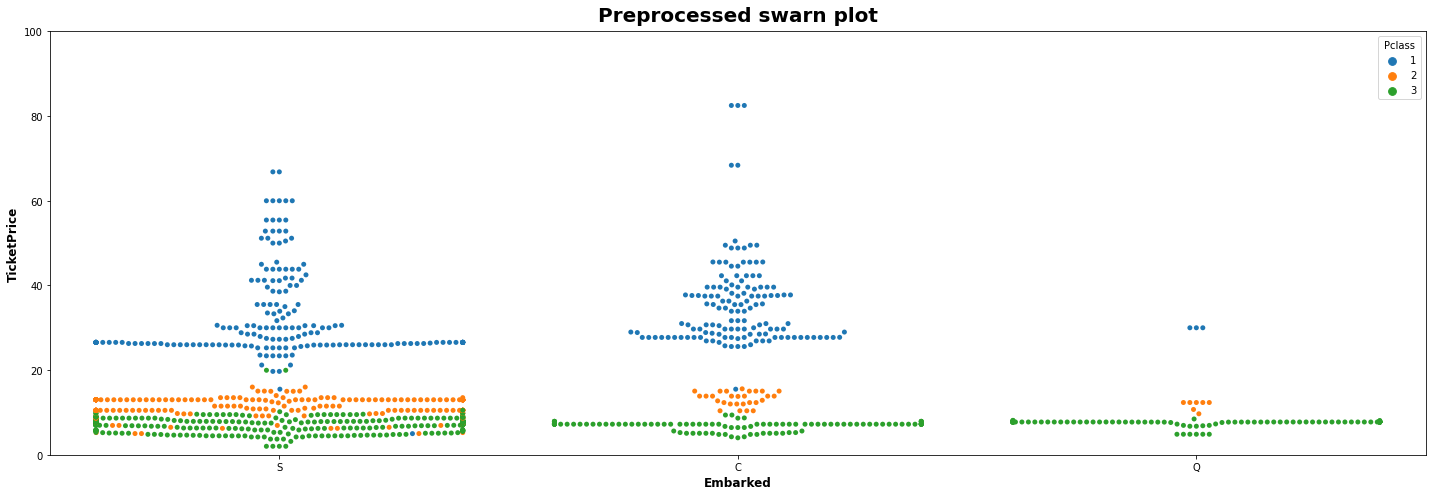

In [38]:
fig, ax = plt.subplots()
sns.swarmplot(x='Embarked', y='TicketPrice', hue='Pclass', data=data)
plt.ylim(0, 100)
ax.set(title='Preprocessed swarn plot');

# 2.5) Age

In [39]:
data['Age'].isna().sum()

263

In [40]:
data['Initial']= 0
data['Initial']= data['Name'].str.extract('([A-Za-z]+)\.')
data.groupby(['Initial','Sex'])['Initial'].count().to_frame()

Initial
Initial  Sex            
Capt     male          1
Col      male          4
Countess female        1
Don      male          1
Dona     female        1
Dr       female        1
         male          7
Jonkheer male          1
Lady     female        1
Major    male          2
Master   male         61
Miss     female      260
Mlle     female        2
Mme      female        1
Mr       male        757
Mrs      female      197
Ms       female        2
Rev      male          8
Sir      male          1

In [41]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                 ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mrs'],inplace=True)
data.groupby(['Initial','Sex'])['Initial'].count().to_frame()

Initial
Initial Sex            
Master  male         61
Miss    female      265
Mr      female        1
        male        769
Mrs     female      200
Other   male         13

In [42]:
data.loc[data['Initial'].isin(['Mr'])& data['Sex'].isin(['female'])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,FamilySize,People/Ticket,TicketPrice,Initial
PassengerId,,,,,,,,,,,,,,,,
797,Survived,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,Leader,1,1,25.9292,Mr


In [43]:
data.loc[797, 'Initial']= 'Mrs'

In [44]:
data.groupby(['Initial','Pclass'])['Age'].agg(median_age=(lambda x: x.median()), count=(lambda x: x.count()))

median_age  count
Initial Pclass                   
Master  1              6.0      5
        2              2.0     11
        3              6.0     37
Miss    1             30.0     62
        2             20.0     49
        3             18.0    103
Mr      1             42.0    141
        2             30.0    139
        3             26.0    312
Mrs     1             45.0     71
        2             30.5     54
        3             31.0     49
Other   1             53.0      5
        2             41.5      8

In [45]:
ages_before_transform = data.groupby(['Initial', 'Pclass',(data['Parch']>0)])['Age'].count()
ageMedian_by_initial_for_children = data.groupby(['Initial', 'Pclass',(data['Parch']>0)])['Age'].median()

In [46]:
for initial in ageMedian_by_initial_for_children.index:
    data['Age'][(data.Age.isnull())& 
                (data.Initial == initial[0])& 
                (data.Pclass == initial[1])& 
                (data.Parch == initial[2])] = ageMedian_by_initial_for_children[initial]
    data['Age'][(data.Age.isnull())& 
                (data.Initial == initial[0])& 
                (data.Pclass == initial[1])& 
                (data.Parch != initial[2])] = ageMedian_by_initial_for_children[initial]

In [47]:
data.groupby(['Initial', 'Pclass',(data['Parch']>0)])['Age'].count().to_frame()

Age
Initial Pclass Parch     
Master  1      True     5
        2      True    11
        3      False    2
               True    43
Miss    1      False   44
               True    19
        2      False   29
               True    22
        3      False  106
               True    45
Mr      1      False  140
               True    29
        2      False  139
               True    13
        3      False  417
               True    31
Mrs     1      False   53
               True    28
        2      False   32
               True    23
        3      False   29
               True    36
Other   1      False    5
        2      False    6
               True     2

In [48]:
data.groupby(['Initial', 'Pclass',(data['Parch']>0)])['Age'].count().to_frame() - ages_before_transform.to_frame()

Age
Initial Pclass Parch     
Master  1      True     0
        2      True     0
        3      False    1
               True     7
Miss    1      False    1
               True     0
        2      False    2
               True     0
        3      False   38
               True    10
Mr      1      False   28
               True     0
        2      False   13
               True     0
        3      False  131
               True     5
Mrs     1      False    9
               True     1
        2      False    1
               True     0
        3      False   10
               True     6
Other   1      False    0
        2      False    0
               True     0

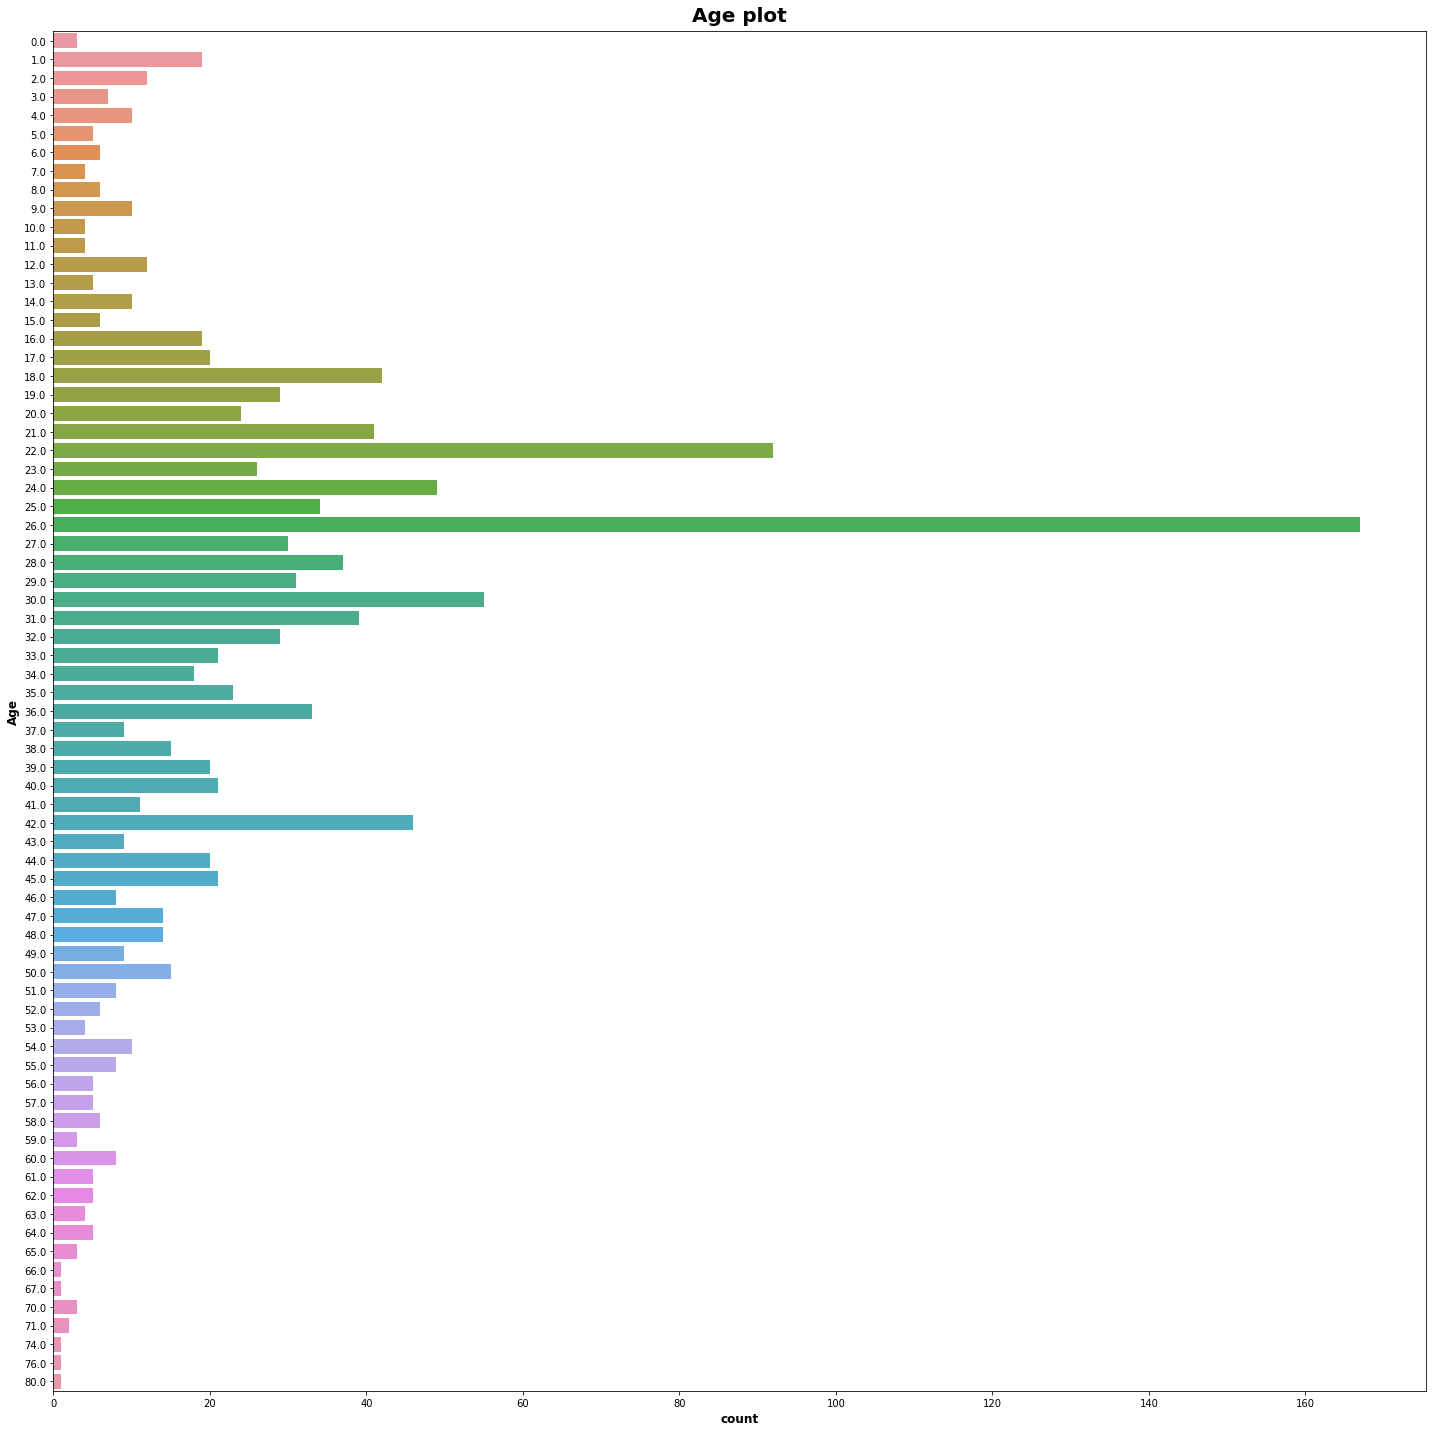

In [49]:
fig, ax = plt.subplots(figsize=(20,20))
sns.countplot(data=data.round(), y='Age')
ax.set(title='Age plot');

# 2.6) Cabin

In [50]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [51]:
data['Cabin'].isna().sum()

1014

In [52]:
data['Cabin'].fillna('N', inplace=True)

In [53]:
data['Cabin_type'] = data['Cabin'].apply(lambda x: x[0])

In [54]:
data.groupby(['Cabin_type', 'Pclass'])['Name'].count().to_frame().style.background_gradient(cmap='winter_r')

In [55]:
data.groupby(['Cabin_type', 'Pclass'])['TicketPrice'].mean().to_frame().style.background_gradient(cmap='summer_r')

In [56]:
data.loc[(data['Cabin_type']=='N')&(data['Pclass']==1), 'Cabin_type'] = 'N1'
data.loc[(data['Cabin_type']=='N')&(data['Pclass']==2), 'Cabin_type'] = 'N2'
data.loc[(data['Cabin_type']=='N')&(data['Pclass']==3), 'Cabin_type'] = 'N3'

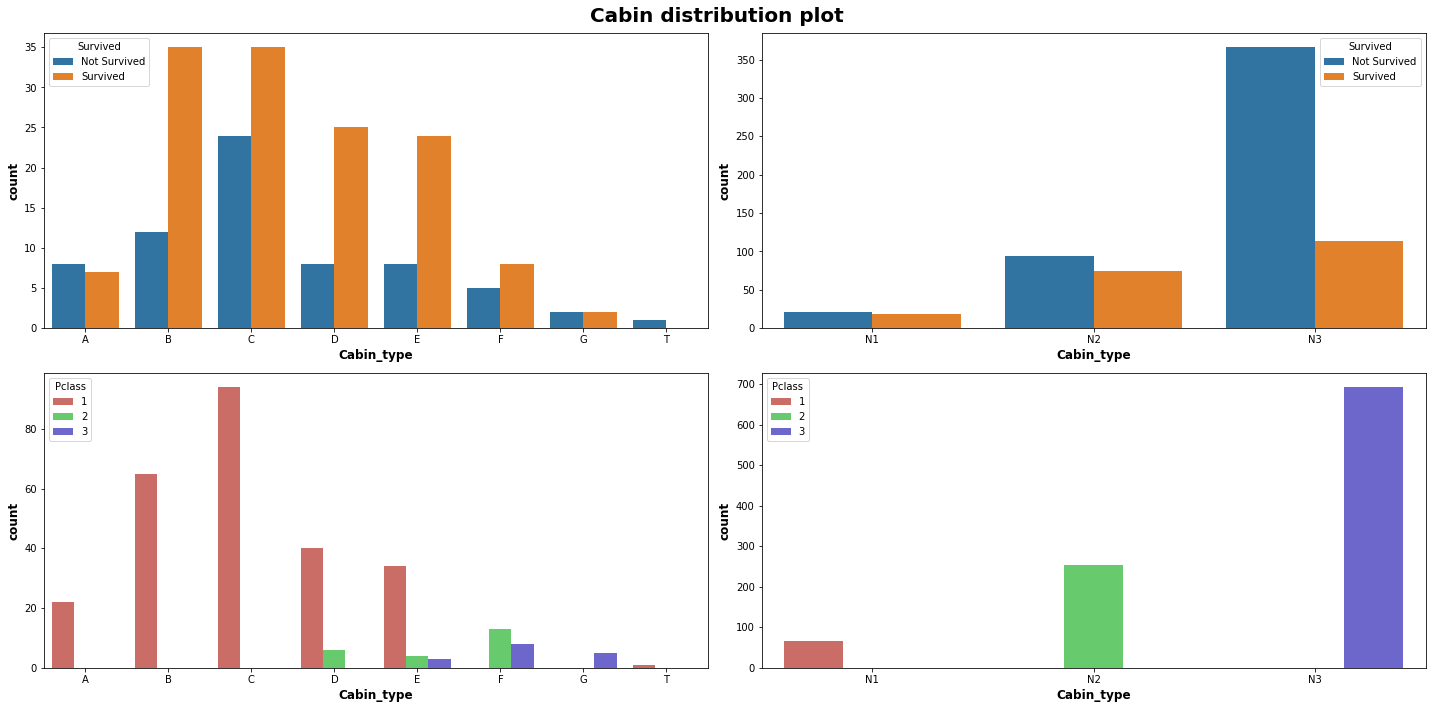

In [57]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
k = ['A','B','C','D','E','F','G','T']; s=['N1','N2','N3']
sns.countplot(ax=ax[0,0], x='Cabin_type', order=k, hue='Survived', data=data)
sns.countplot(ax=ax[0,1], x='Cabin_type', order=s, hue='Survived', data=data)
sns.countplot(ax=ax[1,0], x='Cabin_type', order=k, hue='Pclass', palette='hls', data=data)
sns.countplot(ax=ax[1,1], x='Cabin_type', order=s, hue='Pclass', palette='hls', data=data)
fig.suptitle('Cabin distribution plot');

# **3) New Features**

In [58]:
data['Survived'].replace({'Survived':1, 'Not Survived':0}, inplace=True)

In [59]:
data['Price_range']=pd.qcut(data['TicketPrice'],4)
data.groupby('Price_range')['Survived'].mean().to_frame().style.background_gradient(cmap='plasma_r')

,Survived
Price_range,
"(2.012, 7.65]",0.276316
"(7.65, 8.113]",0.255605
"(8.113, 15.05]",0.382883
"(15.05, 128.082]",0.628440


In [60]:
data['Price_range'] = data['Price_range'].cat.codes

In [61]:
data['SurTix'] = data['Surname'] + data['Pclass'].map(str)
data['SurTix_duplicated'] = data['SurTix'].duplicated(keep=False) * 1
data['IsChild'] = data['Age'].apply(lambda x: 1 if x<=15 else 0)
data['IsFamily'] = data.apply(lambda x: 1 if x['SurTix_duplicated']==1 else 0, axis=1)

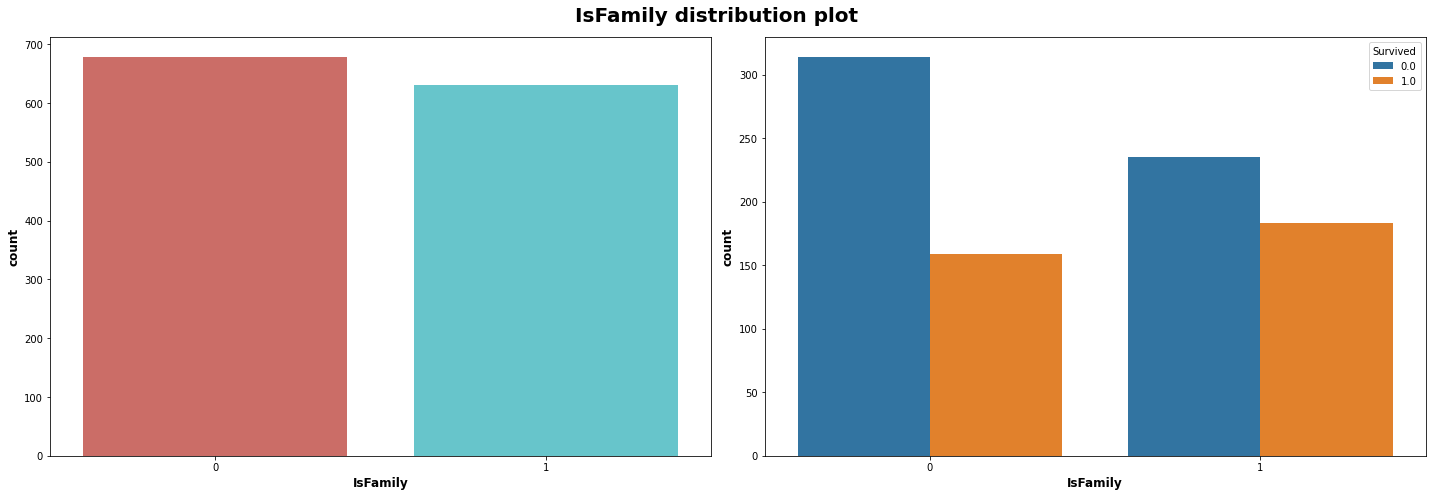

In [62]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.countplot(ax=ax[0], x='IsFamily', palette='hls', data=data)
sns.countplot(ax=ax[1], x='IsFamily', hue='Survived',data=data)
fig.suptitle('IsFamily distribution plot');

In [63]:
FamilyWithChild = data[(data.IsFamily==1)&(data.IsChild==1)]['SurTix'].unique()

In [64]:
FamilyWithChild

array(['Palsson3', 'Nasser2', 'Sandstrom3', 'Rice3', 'McGowan3',
       'Nicola-Yarred3', 'Laroche2', 'Panula3', 'West2', 'Goodwin3',
       'Skoog3', 'Moubarek3', 'Caldwell2', 'Zabour3', 'Andersson3',
       'Ford3', 'Sage3', 'Goldsmith3', 'Johnson3', 'Lefebre3', 'Asplund3',
       'Becker2', 'Kink-Heilmann3', 'Navratil2', 'Strom3', 'Collyer2',
       'Allison1', 'Coutts3', 'Elias3', 'Nakid3', 'Richards2',
       'Van Impe3', 'Carter1', 'Dodge1', 'Mellinger2', 'Baclini3',
       'Hirvonen3', 'Quick2', 'Hart2', 'Davies2', 'Karun3', 'Harper2',
       'Wells2', 'Moor3', 'Hamalainen2', 'Dean3', 'Thomas3', 'Mallet2',
       'Yasbeck3', 'Boulos3', 'Svensson3', 'Olsen3', 'Ryerson1', 'Watt2',
       'Touma3', 'Brown2', 'van Billiard3', 'Drew2', 'Spedden1',
       'Danbom3', 'Johnston3', 'Klasen3', 'Peacock3', 'Rosblom3', 'Aks3',
       'Betros3', 'Abbott3', 'Peter3'], dtype=object)

In [65]:
data['FamilyId'] = 0
x = 1
for tix in FamilyWithChild:
    data.loc[data['SurTix']==tix, ['FamilyId']] = x
    x += 1

In [66]:
data['MatchingSurvivors'] = 1 
Survived_by_FamilyId = data.groupby('FamilyId')['Survived'].sum()
for i in range(1, len(FamilyWithChild)+1):
    if Survived_by_FamilyId[i] >= 1:
        data.loc[data['FamilyId']==i, ['MatchingSurvivors']] = 2
    elif Survived_by_FamilyId[i] == 0:
        data.loc[data['FamilyId']==i, ['MatchingSurvivors']] = 0

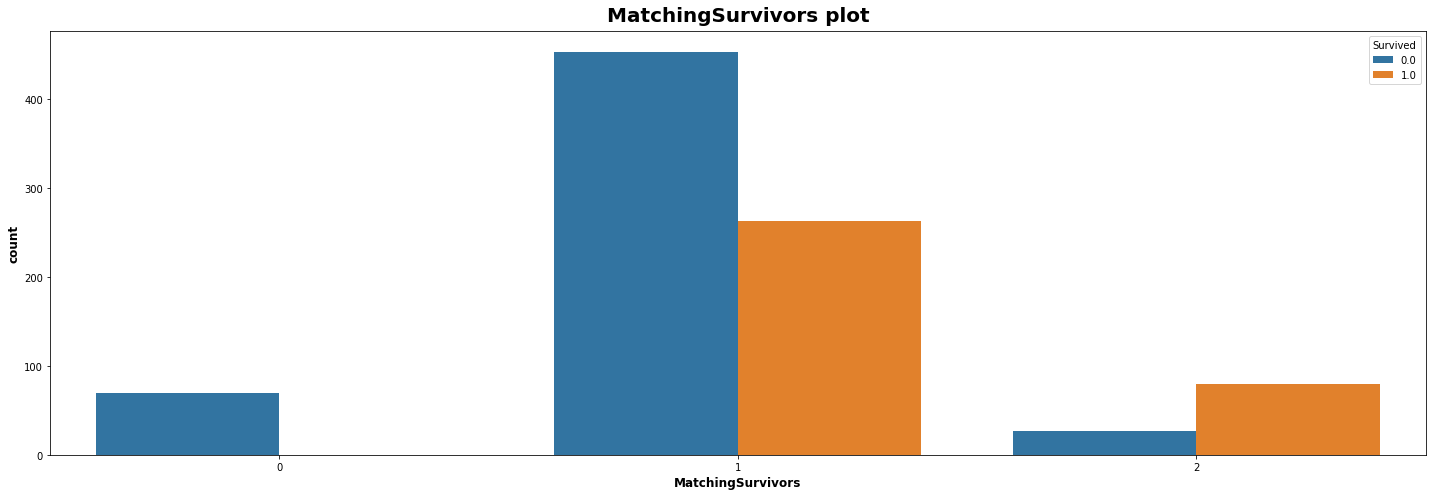

In [67]:
fig, ax = plt.subplots()
sns.countplot(x='MatchingSurvivors', hue='Survived', data=data)
ax.set(title='MatchingSurvivors plot');

# **4) Encoding**

In [68]:
data.drop('Survived', axis=1, inplace=True)

In [69]:
data['Sex'].replace({'male':0, 'female':1}, inplace=True)
data['Embarked'].replace({'S':1, 'C':2, 'Q':3}, inplace=True)
data['Initial'].replace({'Mr':1, 'Mrs':0, 'Miss':0, 'Master':0, 'Other':1}, inplace=True)
data['Cabin_type'].replace({'A':0, 'B':0, 'C':0, 'D':1, 'E':1, 'N1':1, 'F':2, 'N2':2, 'G':3, 'T':3, 'N3':3}, inplace=True)

In [70]:
data.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Surname', 'FamilySize', 'People/Ticket',
       'TicketPrice', 'Initial', 'Cabin_type', 'Price_range', 'SurTix',
       'SurTix_duplicated', 'IsChild', 'IsFamily', 'FamilyId',
       'MatchingSurvivors'],
      dtype='object')

In [71]:
columns_drop=['Name','Sex', 'Age','SibSp', 'Parch','Ticket', 'Fare','Cabin', 'Embarked', 'Surname', 'FamilySize', 'People/Ticket',
              'SurTix', 'SurTix_duplicated', 'IsChild', 'IsFamily', 'FamilyId', 'TicketPrice']
data.drop(columns_drop, axis=1, inplace=True)

In [72]:
data.columns

Index(['Pclass', 'Initial', 'Cabin_type', 'Price_range', 'MatchingSurvivors'], dtype='object')

In [73]:
scaler = StandardScaler()
#scaler = MinMaxScaler() # worse

x = data.values
x_scaled = scaler.fit_transform(x)
train_scaled = pd.DataFrame(x_scaled,index=data.index)
train_scaled.columns = data.columns

# **5) Model predict**

In [74]:
X = train_scaled.iloc[0:891] ; X_test = train_scaled.iloc[891:]

In [75]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, shuffle=False)

In [76]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
model.predict(X_cv)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0])

In [77]:
mean_absolute_error(y_cv, model.predict(X_cv))

0.16417910447761194

In [78]:
model.fit(X,y)

RandomForestClassifier()

In [79]:
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': X_test.index, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
